In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axisartist import SubplotZero

## Trigonometric Axis

In [2]:
class TrigAxes():
    
    def __init__(self, figsize=(12,5)):
        self.xlim = (-1.2, 1.2)
        self.ylim = (-1.2, 1.2)
        self.figsize  = figsize
        self.angles   = []
        self.scale_arrows()

    def __arrow__(self, x, y, dx, dy, width, length):
        plt.arrow(
            x, y, dx, dy, 
            color       = 'k',
            clip_on     = False, 
            head_width  = self.head_width, 
            head_length = self.head_length
        ) 
        
    def __drawAxis__(self):
        """
        Draws the 2D cartesian axis
        """
        # A subplot with two additional axis, "xzero" and "yzero"
        # corresponding to the cartesian axis
        ax = SubplotZero(self.fig, 1, 1, 1)
        self.fig.add_subplot(ax)
        
        # make xzero axis (horizontal axis line through y=0) visible.
        for axis in ["xzero","yzero"]:
            ax.axis[axis].set_visible(True)
        # make the other axis (left, bottom, top, right) invisible
        for n in ["left", "right", "bottom", "top"]:
            ax.axis[n].set_visible(False)
            
        # Plot limits
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)
        
        # No ticks for the trigonometric circle
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        # Draw the trigonometric circle
        self.circle = plt.Circle((0, 0), 1, color='#000000', fill=False)
        ax.add_artist(self.circle)
        
        # Draw the arrows
        self.__arrow__(self.xlim[1], 0, 0.01, 0, 0.3, 0.2) # x-axis arrow
        self.__arrow__(0, self.ylim[1], 0, 0.01, 0.2, 0.3) # y-axis arrow
        
    def scale_arrows(self):
        """ Make the arrows look good regardless of the axis limits """
        xrange = self.xlim[1] - self.xlim[0]
        yrange = self.ylim[1] - self.ylim[0]
        
        self.head_width  = min(xrange/30, 0.25)
        self.head_length = min(yrange/30, 0.3)
        
        
    def draw(self, imgpath=None):
        
        self.scale_arrows()
        self.fig = plt.figure(figsize=self.figsize)
        # First draw the axis
        self.__drawAxis__()
        # Plot each vector
        for angle in self.angles:
            angle.draw()
        # Save the image?
        if imgpath:
            plt.tight_layout()
            plt.savefig(imgpath, dpi=100)
        plt.show()
    
    #-------------------------------------------------
    # Angles
    #-------------------------------------------------
    def addAngles(self, angles):
        for a in angles:
            self.addAngle(a)
            
    def addAngle(self, a):
        # Modify the head length & width of the vector 
        # so it looks good for this axis
        a.head_width  =  self.head_width / 2.
        a.head_length =  self.head_length / 2.
        self.angles.append(a)

## Angle

In [3]:
class Angle():
    """
    Angle(theta, label)
        theta: angle on the trigonometric circle
        label: optional label, default is theta
    """
    def __init__(self, theta, 
                 label       = None,
                 color       = '#6897bb', 
                 linewidth   = 0.01, 
                 linestyle   = '-',
                 head_width  = 0.25,
                 head_length = 0.3
                ):
        # Theta, label
        self.theta = math.radians(theta)
        if label:
            self.label = str(label)
        else:
            self.label = str(theta)
            
        # Drawing options
        self.color = color
        self.linewidth = linewidth
        self.linestyle = linestyle
        self.head_width  = head_width
        self.head_length = head_length
        self.text_args = {
            'ha': 'left', 
            'va': 'center', 
            'fontsize': 12, 
            'color': self.color
        }

    
    def draw(self):
        # Plot the vector
        plt.arrow(
            0, 0,
            math.cos(self.theta), math.sin(self.theta), 
            color = self.color,
            width = self.linewidth,
            head_width = self.head_width, 
            head_length = self.head_length
        )
        # Add the label
        plt.text(
            math.cos(self.theta) + 0.1,
            math.sin(self.theta) + 0.1,
            self.label,
            **self.text_args
        )
        

## Demo - Circle Alone

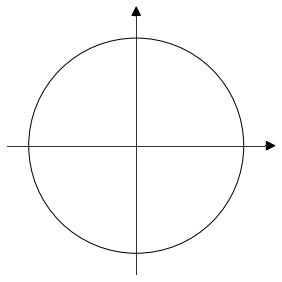

In [4]:
# Create the trigonometric axis
axes = TrigAxes(figsize=(4,4))

axes.draw(imgpath="../img/trig_circle.png")

## Demo - Circle + Angles

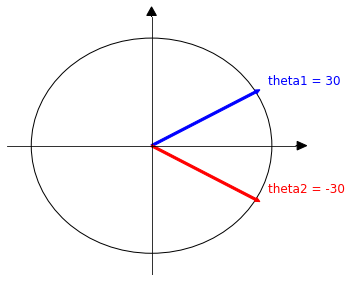

In [5]:
# Create the trigonometric axis
axes = TrigAxes(figsize=(5,4))

axes.addAngle(Angle(30, label='theta1 = 30', color='blue', linewidth=0.02))
axes.addAngle(Angle(-30, label='theta2 = -30', color='red', linewidth=0.02))

axes.draw(imgpath="../img/circle_angles.png")